#Ejemplo de procesamiento del lenguaje

##Link de los archivos [aqui](https://drive.google.com/drive/folders/15ksnKTfcSsisz1PkTiFxlDeeUCKed4J6?usp=sharing)

## En este ejercicio trabajaremos procesando una base de datos n o estructurada proveniente de twiiter.
##Existen 5 archivos csv que contienen tuits correspondientes a los siguientes #hashtag:


1.   apruebo.
2.   dolar.
3.   incertidumbre
4.   inflacion 
5.   rechazo

##Debe considerar que son tuits recientes. Estos tuits puede haber sido escritos por cualquier usuario y hacer relacion a cualquier contexto. El unico requisito es que el tuit contenga el hashtag.





##Configurar ***`drive`***.


1.   Pedir acceso.
2.   Crear acceso directo en ***`drive`*** para poder leer la carpeta MK que contiene los tuits.




In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Crear preambulo para procesar texto

In [24]:
# Entorno y gestion de paquetes
!pip install spacy --quiet
#!pip spacy download es_core_news_sm --quiet
!python -m spacy download es_core_news_md --quiet
!python -m spacy download es_core_news_sm --quiet

2022-11-07 23:59:01.446121: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 42.3 MB 1.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
2022-11-07 23:59:15.923062: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 12.9 MB 8.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [25]:
# Carga librerias
import warnings
warnings.filterwarnings('ignore')
import spacy
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import string
remove_punct_map = dict.fromkeys(map(ord, string.punctuation))
from nltk import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
esp_stop = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


##Manejar los directorios para entrar a la carpeta

In [28]:
ls

ls: cannot open directory '.': Transport endpoint is not connected


#Chequear Ruta de acceso a la carpeta

In [29]:
cd /content/gdrive/MyDrive/MK

/content/gdrive/MyDrive/MK


##Exploremos un poco la carpeta datatuits

In [31]:
ls

datatuits/  datatuitsTotal_.csv


In [32]:
cd datatuits

/content/gdrive/MyDrive/MK/datatuits


In [33]:
ls

apruebo.csv     dolar.csv          inflacion.csv
apruebo.gsheet  incertidumbre.csv  rechazo.csv


##Cargar la base de datos 

In [34]:
df = pd.read_csv('inflacion.csv', sep ='\t')

##Informacion presente en el dataframe. Nombre de columnas.

In [12]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

##Numero de columnas.

In [35]:
len(df.columns)

36

##Numero de observaciones

In [36]:
len(df)

3316

##Seleccionamos las columnas relevantes para este caso.

In [37]:
df=df[['date', 'tweet']]
df.head(20)

,date,tweet
0,2022-07-25,"#Biden, ¿responsable? #Opinión de Arturo Balde..."
1,2022-07-25,Situaciones desesperadas requieren medidas des...
2,2022-07-25,"No nos gusta la #inflacion, porque significa d..."
3,2022-07-25,1er. Foro Monográfico del 2022!! Comenzamos el...
4,2022-07-25,No estoy seguro si TODO es más caro...oh yo so...
5,2022-07-25,IMEFOficial: 🔴 Perspectiva Económica Trimestra...
6,2022-07-25,Precios de la gasolina Julio 2022. Europa paga...
7,2022-07-25,Para abrir cuenta https://t.co/gPHIjGA1po #Bi...
8,2022-07-25,#binanceArgentina #inflacion #Batakis #nodice...
9,2022-07-25,#DolarBlue Eviten quedarse en su casa con peso...


##Otra forma de visulizar

In [16]:
df.sample(20).tweet.tolist()

['Alberto le declara la guerra a la inflación.  #Alberto dice que le va a poner el pecho a la inflación.   La #Inflacion  https://t.co/Tc9xn5kXBf',
 '16:01-Inflación y rebusques. El manual de supervivencia de la clase media y media alta #Inflación #rebusques. #manual #supervivencia #clase #media #media #alta   https://t.co/oiaHJ95mCI',
 '¡Que onda con los partidos poor Licona que sacan spots como “a 10 pesos las tortillas”!   Aja, a todos nos interesa pero ¿cómo lo van a lograr? ¿Bajo que mecanismo, subsidio, etc? ¿Que implica una propuesta así?   Ay, ya estoy en modo señora y sí, ya todo está más caro #Inflacion',
 'AMLO miente!!! En 3 meses la #Inflación estará peor que ahora. 😡😡😡😡😡😡😡',
 '#Inflación no da tregua 💸💸, se ubica en 8.16% 😥😱😱. El #pan 🍞🥪  de caja y la cebolla \U0001f9c5entre los productos con mayores incrementos 💻 https://t.co/yq4O00vODs 📲 https://t.co/H2r4Bbikcf  https://t.co/3zHrMarULA  https://t.co/uMZh3fJtlu',
 'RECORTÓ BIMBO SU PLAN DE INVERSIONES  #Mexico #Bimbo #in

##Pre-procesamiento (ver clase)

In [38]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
df['tweet'] = df['tweet'].str.lower()
df['tweet'] = df['tweet'].replace("  ", " ")
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', string.punctuation))
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', punctuations1))
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', digits))
df['tweet'] = df['tweet'].str.strip()
df = df[df['tweet'].str.len()>2]
df= df[df['tweet'] != ""]
#df = df.reset_index()
print(df.head(10), "\n",
      "Numero de Registros", len(df))

         date                                              tweet
0  2022-07-25  biden responsable opinión de arturo balderas r...
1  2022-07-25  situaciones desesperadas requieren medidas des...
2  2022-07-25  no nos gusta la inflacion porque significa det...
3  2022-07-25  er foro monográfico del  comenzamos el miércol...
4  2022-07-25  no estoy seguro si todo es más carooh yo soy p...
5  2022-07-25  imefoficial 🔴 perspectiva económica trimestral...
6  2022-07-25  precios de la gasolina julio  europa paga el c...
7  2022-07-25  para abrir cuenta  httpstcogphijgapo binance b...
8  2022-07-25  binanceargentina inflacion  batakis nodicennad...
9  2022-07-25  dolarblue eviten quedarse en su casa con pesos... 
 Numero de Registros 3316


In [45]:
df

,date,tweet
0,2022-07-25,biden responsable opinión de arturo balderas r...
1,2022-07-25,situaciones desesperadas requieren medidas des...
2,2022-07-25,no nos gusta la inflacion porque significa det...
3,2022-07-25,er foro monográfico del comenzamos el miércol...
4,2022-07-25,no estoy seguro si todo es más carooh yo soy p...
...,...,...
3311,2022-07-20,🔵me llamo cecilia estamos en mi casa con mi vi...
3312,2022-07-20,por días los precios de los remedios podrán a...
3313,2022-07-20,🔴en dos meses el dólar blue subió prácticament...
3314,2022-07-20,𝕰𝖘𝖙𝖊 𝖒𝖎𝖊𝖗𝖈𝖔𝖑𝖊𝖘 nuevo twitterspace por mexlibe...


##Tokenizar

In [39]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(df)):
  # Rescata la frase escrita sobre el tema
  frase = df.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [40]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens.head(10))
print("Total de Palabras", len(df_tokens))

Primera 10 palabras de las frases 
          token
0        biden
1  responsable
2      opinión
3           de
4       arturo
5     balderas
6    rodríguez
7           la
8     pregunta
9           de
Total de Palabras 83509


In [41]:
# Se eliminan las stopwords
# se pueden agreggar mas stopwords
df_tokens_clean = df_tokens[~df_tokens.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean))

Primera 10 palabras de las frases limpias 
              token
0            biden
1      responsable
2          opinión
4           arturo
5         balderas
6        rodríguez
8         pregunta
10        millones
12  estadunidenses
15         difícil
None
Total de Palabras Limpias 51973


In [43]:
# Frecuencia de palabras
tokens_count = df_tokens_clean['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count = tokens_count[tokens_count.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count.head(20), "\n",
      "Numero de registros", len(tokens_count))

Frecuencia de Palabras 
         token  counts
0   inflación    2635
1   inflacion    1297
2     precios     431
3       julio     384
4    economía     286
5      méxico     278
6     primera     275
7    economia     255
8    quincena     250
9   argentina     250
10      dolar     223
11    aumento     176
12       años     168
13   gobierno     159
14      media     152
15     precio     151
16  alimentos     151
17      dólar     151
18       alta     148
19        bce     143 
 Numero de registros 2413


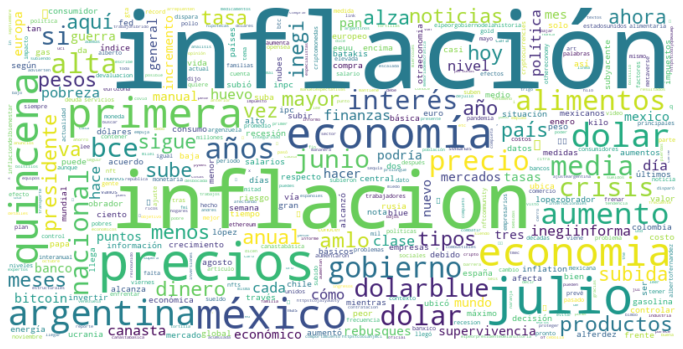

In [46]:
# Pregunta 1. Wordcloud por token
data = dict(zip(tokens_count['token'].tolist(), tokens_count['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#Tarea 3


1.   Cargar todos los archivos de texto (`dolar`,`incertidumbre`,`rechazo`,`apruebo`,`inflacion`) con un loop.

2.   Defina e incluya nuevas stop words.
3.   Cuente el numero de observaciones para cada archivo de texto.
4.   Calcule las palabras mas frecuentes para cada uno.
5.   Calcule la longitud media y la desviacion estandar (numero de palabras de cada tuit y desviacion estandar del numero de palabras) de los tuits por conceptos.
6.   Muestre una nube de palabras por concepto y una nube de palabras total.
7. Muestre una nube comparatoria (`Comparison Cloud`) por conceptos (pista ver [aqui](https://rpubs.com/brandonkopp/creating-word-clouds-in-r))
8. Presentar 1 lamina principales complicaciones y propuesta de diccionario (para solo un concepto). Donde 5 palabras buenas y 5 malas, rn base a juicio experto.




In [ ]:
%load_ext rpy2.ipython